# ÌîÑÎ°úÏ†ùÌä∏ 8: ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôîÎ¶¨Î∑∞ Í∞êÏÑ±Î∂ÑÏÑù ÎèÑÏ†ÑÌïòÍ∏∞

### ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏

In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.5
0.6.0
3.6.0


### 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÏôÄ ÌôïÏù∏

In [3]:
import pandas as pd

from konlpy.tag import Mecab  # Mecab : ÏùºÎ≥∏Ïñ¥ ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
import numpy as np
from collections import Counter

from tensorflow import keras
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Ï†ïÍ∑ú ÌëúÌòÑÏãù

from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [4]:
import pandas as pd

train_data = pd.read_table('/content/drive/MyDrive/sentiment_classification/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/sentiment_classification/ratings_test.txt')

train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

In [5]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Î¶¨Î∑∞ Í∞úÏàò ÌôïÏù∏
print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú : ', train_data.shape)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú : ', test_data.shape)

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú :  (150000, 3)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú :  (50000, 3)


### 2. Îç∞Ïù¥ÌÑ∞Î°úÎçî Íµ¨ÏÑ±

* Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÎ≥µ Ï†úÍ±∞
* NaN Í≤∞Ï∏°Ïπò Ï†úÍ±∞
* ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÌÜ†ÌÅ∞Ìôî
* Î∂àÏö©Ïñ¥(Stopwords) Ï†úÍ±∞
* ÏÇ¨Ï†Ñword_to_index Íµ¨ÏÑ±
* ÌÖçÏä§Ìä∏ Ïä§Ìä∏ÎßÅÏùÑ ÏÇ¨Ï†Ñ Ïù∏Îç±Ïä§ Ïä§Ìä∏ÎßÅÏúºÎ°ú Î≥ÄÌôò
* X_train, y_train, X_test, y_test, word_to_index Î¶¨ÌÑ¥

#### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨


* Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÎ≥µ Ï†úÍ±∞
* NaN Í≤∞Ï∏°Ïπò Ï†úÍ±∞

In [6]:
# Ï§ëÎ≥µÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò
train_data[['document', 'label']].nunique()  # nuniqueÎäî ÏÑ†ÌÉùÎêú Ï∂ïÏóê ÎåÄÌï¥ÏÑú Í≥†Ïú†Ìïú ÏöîÏÜåÏùò ÏàòÎ•º Íµ¨ÌïòÎäî Î©îÏÑúÎìú

document    146182
label            2
dtype: int64

ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞Îäî 150,000-146812 = 3,818Í∞úÏùò Î¶¨Î∑∞Í∞Ä Ï§ëÎ≥µÎêòÍ≥†, Î†àÏù¥Î∏îÏùÄ 0Í≥º 1Îßå ÏûàÏúºÎØÄÎ°ú Ï§ëÎ≥µÌïòÏßÄ ÏïäÎäî Í∞úÏàòÎäî 2Í∞úÏù¥Îã§.

In [7]:
# Ï†ïÍ∑ú ÌëúÌòÑÏãùÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌïúÍ∏Ä, Ïà´Ïûê, Í≥µÎ∞±ÏùÑ Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ï†úÍ±∞ÌïúÎã§.
train_data['document'] = train_data['document'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£0-9 ]", "")

train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


id                                           document  label
0   9976970                                  ÏïÑ ÎçîÎπô ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                         Ìù†Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§ÑÏò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                          ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôîÏä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ Îçò...      1

In [8]:
# train_dataÏóê document Ïó¥Ïóê Îπà Í∞íÏùÑ Í∞ÄÏßÑ ÌñâÏù¥ ÏûàÎã§Î©¥ Null Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
train_data['document'].replace('', np.nan, inplace=True)

# Îã§Ïãú Ìïú Î≤à Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
train_data.isnull().sum()

id            0
document    694
label         0
dtype: int64

In [9]:
train_data.loc[train_data.document.isnull()][:5]

id document  label
668   1600635      NaN      0
1559  6918082      NaN      1
1840  7095375      NaN      1
2073   384233      NaN      1
2648   423224      NaN      1

In [10]:
train_data = train_data.dropna(how='any')

print('Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ', len(train_data))

Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  149306


In [11]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÎèÑ Ï†ïÍ∑ú ÌëúÌòÑÏãùÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌïúÍ∏Ä, Ïà´Ïûê, Í≥µÎ∞±ÏùÑ Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ï†úÍ±∞ÌïúÎã§. 
test_data['document'] = test_data['document'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£0-9 ]", "")

# test_dataÏóê document Ïó¥Ïóê Îπà Í∞íÏùÑ Í∞ÄÏßÑ ÌñâÏù¥ ÏûàÎã§Î©¥ Null Í∞íÏúºÎ°ú Î≥ÄÍ≤ΩÌïúÎã§.
test_data['document'].replace('', np.nan, inplace=True)

# NaNÏùÄ ÏïÑÎ¨¥Îü∞ ÏùòÎØ∏Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ïù¥ÎØÄÎ°ú Ï†úÍ±∞ÌïúÎã§.
test_data = test_data.dropna(how = 'any')

print('Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :', len(test_data))

Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : 49773


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


#### 2-2.ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥(Stopwords) Ï†úÍ±∞, word_to_index

* ÌïúÍµ≠Ïñ¥Î•º ÌÜ†Í∑ºÌôîÌï† Îïå, ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö©ÌïúÎã§.
* ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨Î•º ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Í∏¥ ÌÖçÏä§Ìä∏Î•º Îã®Ïñ¥Î≥ÑÎ°ú Ï™ºÍ∞úÎäî ÏûëÏóÖÏù¥Îã§.
* ÌÜ†ÌÅ∞Ìôî Í≥ºÏ†ïÏóêÏÑú Î∂àÏö©Ïñ¥Î•º Ï†úÍ±∞ÌïúÎã§.
* ÌÜ†ÌÅ∞ÌôîÎêú Îã®Ïñ¥Îì§ÏùÑ Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôòÌïúÎã§.

In [12]:
# from konlpy.tag import MecabÎ•º ÏúÑÌï¥ ÏÑ§ÏπòÌïúÎã§.
!%%bash
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1
!pip3 install konlpy
!%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"
!%%bash
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip3 install /tmp/mecab-python-0.996

/bin/bash: line 0: fg: no job control
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading packa

In [13]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Í∞ùÏ≤¥ ÏÉùÏÑ±
tokenizer = Mecab()

# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏(Î∂àÏö©Ïñ¥ÎûÄ Î¨∏Ïû• ÎÇ¥ÏóêÏÑú ÎπàÎ≤àÌïòÍ≤å Î∞úÏÉùÌïòÏó¨ ÏùòÎØ∏Î•º Î∂ÄÏó¨ÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ Îã®Ïñ¥)
stopwords = ['Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Îì§','Îäî','Ï¢Ä','Ïûò','Í∞ï','Í≥º','ÎèÑ', 'Î•º', 'ÏúºÎ°ú','Ïûê', 'Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def load_data(train_data, test_data, num_words=10000):
    # ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏóêÏÑú document Ïó¥ÏóêÏÑú Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
    train_data.drop_duplicates(subset=['document'], inplace=True)
    # ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Ìñâ Ï†úÍ±∞
    train_data = train_data.dropna(how = 'any')
    # ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÏóêÏÑú document Ïó¥ÏóêÏÑú Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
    test_data.drop_duplicates(subset=['document'], inplace=True)
    # ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Ìñâ Ï†úÍ±∞
    test_data = test_data.dropna(how = 'any')

    # ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÌÜ†ÌÅ∞Ìôî Î∞è Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence)  # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords]  # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence)  # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords]  # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_test.append(temp_X)

    # ÏÇ¨Ï†Ñ ÏûëÏÑ±
    words = np.concatenate(X_train).tolist()  #.tolist() : arrayÎ•º listÎ°ú Î≥ÄÍ≤Ω
    counter = Counter(words)                  # collection Î™®ÎìàÏùò Counter ÌÅ¥ÎûòÏä§Î°ú Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò ÌôïÏù∏
    counter = counter.most_common(10000-4)    # most_common() : Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÍ∞Ä ÎßéÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú Î∞∞Ïó¥ Î¶¨ÌÑ¥
    vocab = ['<PAD>','<BOS>','<UNK>','<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    # word_to_index
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        # wordlist Ïóê ÏûàÎäî wordÏóê ÎåÄÌï¥ÏÑú ÎßåÏïΩÏóê wrodÍ∞Ä word_to_indexÏóê Ï°¥Ïû¨ÌïòÎ©¥ Ïù∏Îç±Ïä§ Í∞íÏùÑ, Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏúºÎ©¥ <UNK>Î•º Ïù∏Îç±Ïä§Î°ú Î∞òÌôò  
    
    X_train = list(map(wordlist_to_indexlist, X_train)) # X_train ÎåÄÏÉÅÏúºÎ°ú worldlist_to_indexlist Ìï®ÏàòÎ•º ÏàòÌñâÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôò
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [14]:
print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {}, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {}".format(len(X_train), len(X_test)))

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 143856, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 48498


In [15]:
# key = index, value = wordÎ°ú Î≥ÄÍ≤Ω
index_to_word = {index:word for word, index in word_to_index.items()}
print(len(word_to_index))

10000


#### 2-3. ÌÖçÏä§Î•º Ïà´ÏûêÎ°ú (encoding), Ïà´ÏûêÎ•º ÌÖçÏä§Ìä∏Î°ú (decoding)

In [16]:
# Î¨∏Ïû• 1Í∞úÎ•º ÌôúÏö©Ìï† ÎîïÏÖîÎÑàÎ¶¨ÏôÄ Ìï®Íªò Ï£ºÎ©¥, Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥ Ï£ºÎäî Ìï®ÏàòÏù¥Îã§. 
# Îã®, Î™®Îì† Î¨∏Ïû•ÏùÄ <BOS>Î°ú ÏãúÏûëÌïòÎäî Í≤ÉÏúºÎ°ú ÌïúÎã§.
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# Ïó¨Îü¨ Í∞úÏùò Î¨∏Ïû• Î¶¨Ïä§Ìä∏Î•º ÌïúÍ∫ºÎ≤àÏóê Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú encodeÌï¥ Ï£ºÎäî Ìï®ÏàòÏù¥Îã§.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®ÏàòÏù¥Îã§. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]Î•º ÌÜµÌï¥ <BOS>Î•º Ï†úÏô∏

# Ïó¨Îü¨ Í∞úÏùò Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÌïúÍ∫ºÎ≤àÏóê ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®ÏàòÏù¥Îã§. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

### 3. Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è Í∞ÄÍ≥µ

* Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨
* Ï†ÅÏ†àÌïú ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏßÄÏ†ï
* keras.preprocessing.sequence.pad_sequences ÏùÑ ÌôúÏö©Ìïú Ìå®Îî© Ï∂îÍ∞Ä

#### Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨

In [17]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨
total_data_text = list(X_train) + list(X_test)

num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

print('Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† : ', np.mean(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ : ', np.max(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® : ', np.std(num_tokens))

Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† :  14.108799401104214
Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ :  84
Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® :  11.58840117345961


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


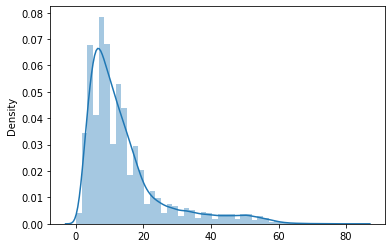

In [18]:
# Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
sns.distplot(num_tokens)

ÏúÑÏóêÏÑú Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑†Ïù¥ ÏïΩ 14.07Ïù¥ ÎÇòÏôîÎã§. ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏïΩ 14ÏóêÏÑú Î∞ÄÎèÑÍ∞Ä ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [19]:
# ÏµúÎåÄ Í∏∏Ïù¥Î•º (ÌèâÍ∑† + 3*ÌëúÏ§ÄÌé∏Ï∞®)Î°ú ÌïúÎã§Î©¥,
max_tokens = np.mean(num_tokens) + 3 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò {}%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§.'.format(np.sum(num_tokens < max_tokens)/len(num_tokens)))

pad_sequences maxlen :  48
Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 0.9704607130602951%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§.


In [20]:
# keras.preprocessing.sequence.pad_sequenceÎ•º ÌôúÏö©Ìïú Ìå®Îî© Ï∂îÍ∞ÄÌïúÎã§.
# Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä maxlenÎ≥¥Îã§ ÏßßÏùÄ Î¨∏Ïû•Ïóê <PAD>Î•º ÏïûÎ∂ÄÎ∂ÑÏóê Ï∂îÍ∞ÄÌïúÎã§.
# RNNÏùÄ ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞Í∞Ä ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ï≤òÎ¶¨ÎêòÎØÄÎ°ú 'pre'Î•º ÏÇ¨Ïö©ÌïúÎã§.
X_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=maxlen)

X_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                      value=word_to_index["<PAD>"],
                                                      padding='pre',
                                                      maxlen=maxlen)

print('shape of X_train: ', X_train.shape)
print('shape of X_test: ', X_test.shape)

shape of X_train:  (143856, 48)
shape of X_test:  (48498, 48)


### 4. Î™®Îç∏ Íµ¨ÏÑ± Î∞è validiation set Íµ¨ÏÑ±

Î™®Îç∏ÏùÄ 3Í∞ÄÏßÄ Ïù¥ÏÉÅ Îã§ÏñëÌïòÍ≤å Íµ¨ÏÑ±ÌïòÏó¨ Ïã§ÌóòÌï¥ Î≥¥ÏÑ∏Ïöî.

#### 4-1. train set, validation set Íµ¨ÏÑ±

In [21]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 80% Í∞úÏàò
print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 80% Í∞úÏàò: ', int(X_train.shape[0]*0.8))

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 80% Í∞úÏàò:  115084


In [22]:
# train data setÏóêÏÑú 80:20Ïùò ÎπÑÏú®Î°ú trianÍ≥º validationÏùÑ Î∂ÑÎ¶¨ÌïúÎã§.
# RNNÏóêÏÑúÎäî ÏàúÏÑúÍ∞Ä Ï§ëÏöîÌïòÎØÄÎ°ú shuffleÏùÄ ÏßÑÌñâÌïòÏßÄ ÏïäÎäîÎã§.
# train set
partial_X_train = X_train[:int(X_train.shape[0]*0.8)]
partial_y_train = y_train[:int(y_train.shape[0]*0.8)]

# validation set
X_valid = X_train[int(X_train.shape[0]*0.8):]
y_valid = y_train[int(X_train.shape[0]*0.8):]

print('partial_X_train : ', partial_X_train.shape)
print('partial_y_train : ', partial_y_train.shape)
print('X_valid : ', X_valid.shape)
print('y_valid : ', y_valid.shape)

partial_X_train :  (115084, 48)
partial_y_train :  (115084,)
X_valid :  (28772, 48)
y_valid :  (28772,)


#### 4-2-1. LSTM Î™®Îç∏

In [259]:
vocab_size = 10000  # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 200  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®Ïõê

model1 = keras.Sequential()
model1.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model1.add(keras.layers.LSTM(128))                     # RNNÏóêÏÑú Í∞ÄÏû• ÎÑêÎ¶¨ ÏÇ¨Ïö©ÌïòÎäî LSTM Î†àÏù¥Ïñ¥ ÏÇ¨Ïö©                   # LSTM Î™®Îç∏ÏùÑ Î∞úÏ†ÑÏãúÌÇ® Î™®Îç∏  
model1.add(keras.layers.Dense(16, activation='relu'))
model1.add(keras.layers.Dense(1,activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 200)         2000000   
                                                                 
 lstm_6 (LSTM)               (None, 128)               168448    
                                                                 
 dense_12 (Dense)            (None, 16)                2064      
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,170,529
Trainable params: 2,170,529
Non-trainable params: 0
_________________________________________________________________


#### 4-2-2. LSTM Î™®Îç∏ ÌõàÎ†®

In [260]:
# ÌïôÏäµ ÌôòÍ≤Ω ÏÑ§Ï†ï
model1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
epochs=20

# Î™®Îç∏ ÌïôÏäµ
history = model1.fit(partial_X_train,
                     partial_y_train,
                     epochs=epochs,
                     batch_size=256,
                     validation_data=(X_valid, y_valid),
                     verbose=1)

Epoch 1/20
450/450 [==============================] - 7s 11ms/step - loss: 0.3928 - accuracy: 0.8191 - val_loss: 0.3449 - val_accuracy: 0.8491
Epoch 2/20
450/450 [==============================] - 5s 11ms/step - loss: 0.3057 - accuracy: 0.8677 - val_loss: 0.3281 - val_accuracy: 0.8581
Epoch 3/20
450/450 [==============================] - 5s 11ms/step - loss: 0.2630 - accuracy: 0.8880 - val_loss: 0.3339 - val_accuracy: 0.8589
Epoch 4/20
450/450 [==============================] - 5s 11ms/step - loss: 0.2289 - accuracy: 0.9049 - val_loss: 0.3496 - val_accuracy: 0.8549
Epoch 5/20
450/450 [==============================] - 5s 10ms/step - loss: 0.1988 - accuracy: 0.9188 - val_loss: 0.3852 - val_accuracy: 0.8550
Epoch 6/20
450/450 [==============================] - 5s 11ms/step - loss: 0.1721 - accuracy: 0.9307 - val_loss: 0.4203 - val_accuracy: 0.8513
Epoch 7/20
450/450 [==============================] - 5s 11ms/step - loss: 0.1485 - accuracy: 0.9417 - val_loss: 0.4751 - val_accuracy: 0.8464

#### 4-2-3. Loss, Accuracy Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [261]:
history_dict = history.history
print(history_dict.keys())  # epochÏóê Îî∞Î•∏ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥º Ïàò ÏûàÎäî Ìï≠Î™©Îì§

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


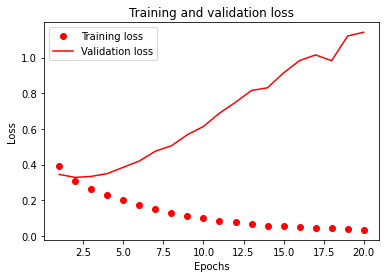

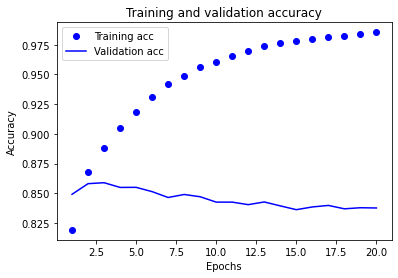

In [262]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   # Í∑∏Î¶ºÏùÑ Ï¥àÍ∏∞ÌôîÌïúÎã§.

# "bo"Îäî "ÌååÎûÄÏÉâ Ï†ê"Ïù¥Îã§.
plt.plot(epochs, acc, 'bo', label='Training acc')
# bÎäî "ÌååÎûÄ Ïã§ÏÑ†"Ïù¥Îã§.
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 4-2-4. ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä

In [37]:
results = model1.evaluate(X_test, y_test, verbose=2)

print(results)

1516/1516 - 5s - loss: 1.2475 - accuracy: 0.8355 - 5s/epoch - 3ms/step
[1.247511386871338, 0.8354571461677551]


#### 4-3-1. 1-D CNN Î™®Îç∏

In [41]:
vocab_size = 10000  # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 200  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®Ïõê

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model2.add(keras.layers.Conv1D(32,7,activation='relu'))
model2.add(keras.layers.MaxPooling1D(5))
model2.add(keras.layers.Conv1D(32,7,activation='relu'))
model2.add(keras.layers.GlobalMaxPooling1D())
model2.add(keras.layers.Dense(16, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim Ïù¥Îã§.

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         2000000   
                                                                 
 conv1d (Conv1D)             (None, None, 32)          44832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 16)               

#### 4-3-2. 1-D CNN Î™®Îç∏ ÌõàÎ†®

In [42]:
# ÌïôÏäµ ÌôòÍ≤Ω ÏÑ§Ï†ï
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

epochs = 20

history = model2.fit(partial_X_train,
                     partial_y_train,
                     epochs=epochs,
                     validation_data=(X_valid, y_valid),
                     verbose=1)

Epoch 1/20
3597/3597 [==============================] - 36s 8ms/step - loss: 0.4416 - accuracy: 0.7818 - val_loss: 0.4012 - val_accuracy: 0.8112
Epoch 2/20
3597/3597 [==============================] - 29s 8ms/step - loss: 0.3345 - accuracy: 0.8461 - val_loss: 0.4207 - val_accuracy: 0.8065
Epoch 3/20
3597/3597 [==============================] - 30s 8ms/step - loss: 0.2407 - accuracy: 0.8920 - val_loss: 0.4666 - val_accuracy: 0.7989
Epoch 4/20
3597/3597 [==============================] - 26s 7ms/step - loss: 0.1733 - accuracy: 0.9215 - val_loss: 0.5633 - val_accuracy: 0.7961
Epoch 5/20
3597/3597 [==============================] - 19s 5ms/step - loss: 0.1369 - accuracy: 0.9375 - val_loss: 0.6718 - val_accuracy: 0.7914
Epoch 6/20
3597/3597 [==============================] - 18s 5ms/step - loss: 0.1147 - accuracy: 0.9460 - val_loss: 0.7717 - val_accuracy: 0.7900
Epoch 7/20
3597/3597 [==============================] - 19s 5ms/step - loss: 0.1013 - accuracy: 0.9519 - val_loss: 0.8934 - val_ac

#### 4-3-3. Loss, Accuracy Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [43]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


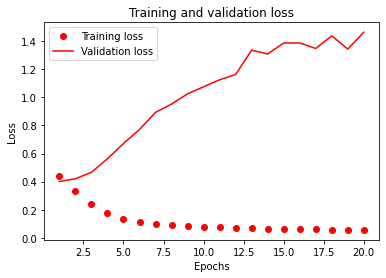

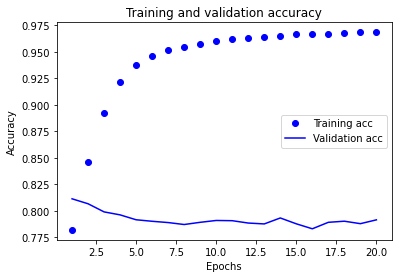

In [48]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 4-3-4. ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä

In [49]:
# test Í≤∞Í≥º
results = model2.evaluate(X_test, y_test, verbose=2)
print(results)

1516/1516 - 4s - loss: 1.4447 - accuracy: 0.7850 - 4s/epoch - 3ms/step
[1.444684624671936, 0.7850427031517029]


#### 4-4-1. GlobalMaxPooling1D() Î†àÏù¥Ïñ¥ 1Í∞ú Î™®Îç∏

In [53]:
vocab_size = 10000
word_vector_dim = 200

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model3.add(keras.layers.GlobalMaxPooling1D())
model3.add(keras.layers.Dense(16, activation='relu'))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 200)         2000000   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 200)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 16)                3216      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,003,233
Trainable params: 2,003,233
Non-trainable params: 0
_________________________________________________________________


#### 4-4-2. GlobalMaxPooling1D() Î™®Îç∏ ÌõàÎ†®

In [55]:
# ÌïôÏäµ ÌôòÍ≤Ω ÏÑ§Ï†ï
model3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

epochs = 20

history = model3.fit(partial_X_train,
                     partial_y_train,
                     epochs=epochs,
                     batch_size=256,
                     validation_data=(X_valid, y_valid),
                     verbose=1)

# verboseÎäî ÌïôÏäµÏùò ÏßÑÌñâ ÏÉÅÌô©ÏùÑ Î≥¥Ïó¨Ï§Ñ Í≤ÉÏù∏ÏßÄ ÏßÄÏ†ïÏùÑ ÌïòÎäîÎç∞ verboseÎ•º 1Î°ú ÏÑ∏ÌåÖÌïòÎ©¥ ÌïôÏäµÏù¥ ÎêòÎäî Î™®ÏäµÏùÑ Î≥º Ïàò ÏûàÎã§.

Epoch 1/20
450/450 [==============================] - 4s 8ms/step - loss: 0.4245 - accuracy: 0.8124 - val_loss: 0.3496 - val_accuracy: 0.8470
Epoch 2/20
450/450 [==============================] - 3s 7ms/step - loss: 0.3005 - accuracy: 0.8740 - val_loss: 0.3442 - val_accuracy: 0.8524
Epoch 3/20
450/450 [==============================] - 3s 7ms/step - loss: 0.2479 - accuracy: 0.9007 - val_loss: 0.3565 - val_accuracy: 0.8503
Epoch 4/20
450/450 [==============================] - 3s 7ms/step - loss: 0.1962 - accuracy: 0.9255 - val_loss: 0.3899 - val_accuracy: 0.8438
Epoch 5/20
450/450 [==============================] - 3s 7ms/step - loss: 0.1447 - accuracy: 0.9492 - val_loss: 0.4297 - val_accuracy: 0.8437
Epoch 6/20
450/450 [==============================] - 3s 7ms/step - loss: 0.0972 - accuracy: 0.9691 - val_loss: 0.4873 - val_accuracy: 0.8407
Epoch 7/20
450/450 [==============================] - 3s 7ms/step - loss: 0.0627 - accuracy: 0.9816 - val_loss: 0.5625 - val_accuracy: 0.8365
Epoch 

#### 4-4-3. GlobalMaxPooling1D() Î™®Îç∏ ÌõàÎ†®

In [58]:
history_dict=history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


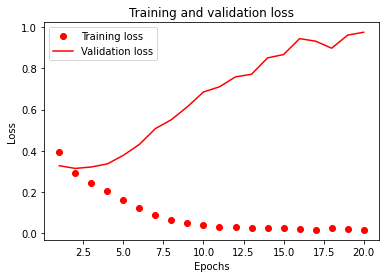

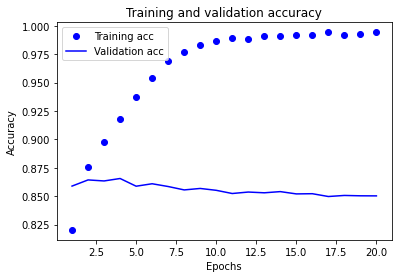

In [97]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 4-4-4. ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä

In [60]:
# test Í≤∞Í≥º
results = model3.evaluate(X_test, y_test, verbose=2)
print(results)

1516/1516 - 4s - loss: 1.2033 - accuracy: 0.8297 - 4s/epoch - 2ms/step
[1.2033262252807617, 0.8297455310821533]


### 5. ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

In [61]:
# Îã®Ïñ¥Ïùò ÌäπÏÑ±ÏùÑ Ï†ÄÏ∞®Ïõê Î≤°ÌÑ∞Í∞íÏúºÎ°ú ÌëúÌòÑÌï† Ïàò ÏûàÎäî ÏõåÎìú ÏûÑÎ≤†Îî©(word embedding) Í∏∞Î≤ï
embedding_layer = model1.layers[0]  # GRUÎ°ú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î∂ÑÏÑù
weights = embedding_layer.get_weights()[0]
print(weights.shape)

(10000, 200)


In [65]:
import os
from gensim import models  # gensim : ÏõåÎìúÎ≤°ÌÑ∞Î•º Îã§Î£®ÎäîÎç∞ Ïú†Ïö©Ìïú Ìå®ÌÇ§ÏßÄ

# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞ ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•ÌïúÎã§.
word2vec_file_path = '/content/drive/MyDrive/sentiment_classification/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™á Í∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ Ïì¥Îã§.

# Îã®Ïñ¥ Í∞úÏàò(Ìà≠ÏàòÎ¨∏Ïûê 4Í∞ú Ï†úÏô∏)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌïúÎã§.
vectors = model2.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [66]:
# ÏûÑÎ≤†Îî© ÌååÎùºÎØ∏ÌÑ∞Î•º ÏùΩÏñ¥ÏÑú word vectorÎ°ú ÌôúÏö©
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['ÏòÅÌôî']
vector

array([ 0.16362952, -0.12624125,  0.00360623,  0.18292579,  0.05774087,
        0.15795624, -0.00607039, -0.16173637,  0.32523558, -0.11305905,
        0.08704822, -0.32016635,  0.06334891,  0.07566755,  0.03210901,
        0.30952215, -0.06550916, -0.01803346, -0.12573326, -0.21421693,
        0.15513657,  0.01664898,  0.02078858,  0.03093729,  0.00548134,
        0.18640698, -0.12905788, -0.07998336,  0.09045084, -0.1317727 ,
        0.11098628, -0.21025914, -0.07092556, -0.06073579,  0.08315822,
       -0.00524681,  0.28950915, -0.06595908,  0.21363118, -0.08702177,
        0.21651064, -0.13964659, -0.03015615,  0.07460336,  0.1440387 ,
       -0.02711013,  0.0092336 ,  0.2056105 , -0.19691555,  0.00384474,
       -0.30575028,  0.01703158,  0.15138601,  0.04528848,  0.03344517,
       -0.17578232,  0.07079928,  0.03717942, -0.014743  ,  0.09109084,
       -0.12757322, -0.15691869,  0.15440913,  0.01750032,  0.06615106,
        0.02219159,  0.10715371, -0.33640483,  0.44301367, -0.09

In [67]:
# Îã®Ïñ¥Î•º ÌïòÎÇò Ï£ºÍ≥† Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ÏôÄ Ïú†ÏÇ¨ÎèÑ Ìôï„ÖáÎãà
word_vectors.similar_by_word("ÏòÅÌôî")

[('ÏòÄ', 0.4502096176147461),
 ('Ïâ¨', 0.4076431095600128),
 ('Ï≤†Ï≤†', 0.37729862332344055),
 ('ÏòÅÏÉÅ', 0.36559951305389404),
 ('Í∏∞ÎåÄ', 0.34841200709342957),
 ('Ïï†Îãà', 0.3369067907333374),
 ('Í≤™', 0.33687397837638855),
 ('Ï§ÑÏ§ÑÏù¥', 0.3361671566963196),
 ('ÌùîÌïò', 0.33497095108032227),
 ('Ï∂îÎÖ∏', 0.33430567383766174)]

### 6. ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© ÌôúÏö©ÌïòÏó¨ ÏÑ±Îä• Í∞úÏÑ†

#### 6-1. ÏÇ¨Ï†ÑÏóê ÌïôÏäµÎêú Word2Vec Îì±Ïùò ÏûÑÎ≤†Îî© Î™®Îç∏(ko.bin)ÏùÑ ÌôúÏö©ÌïòÎäî Ï†ÑÏù¥ÌïôÏäµ(Transfer Learning)

In [174]:
!pip install --upgrade gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
# ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© ÌôúÏö©Ìïú ÏÑ±Îä• Í∞úÏÑ†
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [176]:
word2vec_path = '/content/drive/MyDrive/sentiment_classification/ko.bin'
word2vec = Word2Vec.load(word2vec_path)
# word2vec = gensim.models.Word2vec.load(word2vec_path)  # ÌïôÏäµÌïú Î™®Îç∏ Î°úÎìú

# ÏôÑÏÑ±Îêú ÏûÑÎ≤†Îî© Îß§Ìä∏Î¶≠Ïä§Ïùò ÌÅ¨Í∏∞ ÌôïÏù∏
print(word2vec.wv.vectors.shape)

(30185, 200)


In [184]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000
word_vector_dim = 200
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrixÏóê Word2Vec ÏõåÎìú Î≤°ÌÑ∞Î•º Îã®Ïñ¥ ÌïòÎÇòÏî©ÎßàÎã§ Ï∞®Î°ÄÏ∞®Î°Ä Ïπ¥ÌîºÌïúÎã§.
for i in range(4, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [185]:
# LSTM Î™®Îç∏ Íµ¨ÏÑ±
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,
                                 word_vector_dim,
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=maxlen,
                                 trainable=True))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 48, 200)           2000000   
                                                                 
 lstm_5 (LSTM)               (None, 128)               168448    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,168,577
Trainable params: 2,168,577
Non-trainable params: 0
_________________________________________________________________


In [187]:
# ÌïôÏäµÏùò ÏßÑÌñâ
model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

epochs = 7

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

Epoch 1/7
1799/1799 [==============================] - 31s 14ms/step - loss: 0.3497 - accuracy: 0.8460 - val_loss: 0.3279 - val_accuracy: 0.8573
Epoch 2/7
1799/1799 [==============================] - 13s 7ms/step - loss: 0.2830 - accuracy: 0.8794 - val_loss: 0.3180 - val_accuracy: 0.8631
Epoch 3/7
1799/1799 [==============================] - 13s 7ms/step - loss: 0.2398 - accuracy: 0.9006 - val_loss: 0.3281 - val_accuracy: 0.8602
Epoch 4/7
1799/1799 [==============================] - 14s 8ms/step - loss: 0.1971 - accuracy: 0.9211 - val_loss: 0.3441 - val_accuracy: 0.8642
Epoch 5/7
1799/1799 [==============================] - 13s 7ms/step - loss: 0.1555 - accuracy: 0.9387 - val_loss: 0.3760 - val_accuracy: 0.8614
Epoch 6/7
1799/1799 [==============================] - 13s 7ms/step - loss: 0.1172 - accuracy: 0.9556 - val_loss: 0.4620 - val_accuracy: 0.8491
Epoch 7/7
1799/1799 [==============================] - 13s 7ms/step - loss: 0.0869 - accuracy: 0.9680 - val_loss: 0.5174 - val_accuracy

In [188]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


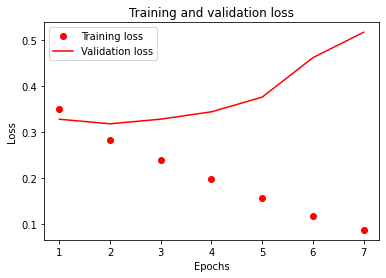

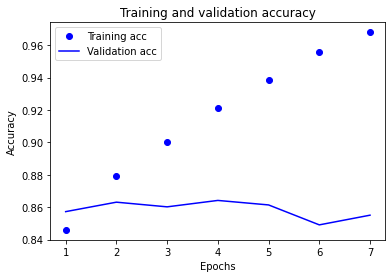

In [189]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [190]:
# ÌÖåÏä§Ìä∏ÏÖãÏùÑ ÌÜµÌïú Î™®Îç∏ ÌèâÍ∞Ä
results = model.evaluate(X_test, y_test, verbose=2)
print(results)

1516/1516 - 4s - loss: 0.5209 - accuracy: 0.8541 - 4s/epoch - 3ms/step
[0.520922839641571, 0.8540970683097839]


In [192]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

* Model1 : LSTM

In [227]:
embedding_layer = model1.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)

(10000, 200)


In [228]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•ÌïúÎã§.
word2vec_file_path = '/content/drive/MyDrive/sentiment_classification/word2vec_RNN.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim)) ## Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ Ïì¥Îã§.

# Îã®Ïñ¥ Í∞úÏàò(ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌïúÎã§.
vectors = model1.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [229]:
# gensimÏóêÏÑú Ï†úÍ≥µÌïòÎäî Ìå®ÌÇ§ÏßÄÎ•º Ïù¥Ïö©Ìï¥, ÏúÑÏóê ÎÇ®Í∏¥ ÏûÑÎ≤†Îî© ÌååÎùºÎØ∏ÌÑ∞Î•º ÏùΩÏñ¥ÏÑú word vectorÎ°ú ÌôúÏö©
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['Ïû¨ÎØ∏']
vector

array([ 0.01168726,  0.084478  , -0.03435707, -0.14456421,  0.11584412,
       -0.0623613 ,  0.02968056,  0.0035247 , -0.00081615, -0.02635366,
        0.09200995, -0.02885733,  0.07483369,  0.05842755,  0.14410357,
       -0.06357124,  0.01956436, -0.09142468,  0.04631441,  0.09238229,
       -0.02338261, -0.07702272,  0.03961678,  0.18518108, -0.07855587,
        0.03761779, -0.10295548,  0.08172774, -0.09536225, -0.1761319 ,
       -0.05258565,  0.01893044,  0.17626697,  0.03358863, -0.00566478,
        0.16170669,  0.08972184,  0.0146762 , -0.01849752, -0.11638485,
        0.08677456,  0.13255131,  0.09273788, -0.11138216, -0.14701593,
        0.00308576,  0.00799491,  0.02130159,  0.02406064,  0.05636022,
       -0.0406412 , -0.05491825,  0.10323472, -0.20824265,  0.12974639,
        0.04692316,  0.06462281,  0.2099775 ,  0.01698889, -0.01880853,
       -0.18794109,  0.0051532 , -0.02482496, -0.02279401, -0.06717815,
       -0.00375752,  0.05087723, -0.06015732,  0.06746443, -0.01

In [230]:
word_vectors.similar_by_word("Ïû¨ÎØ∏")

[('Ïûº', 0.5726073384284973),
 ('Î™∏Ïßì', 0.5283682346343994),
 ('Îãø', 0.5276622772216797),
 ('Ïû¨Î∞å', 0.5275838971138),
 ('Ïµú', 0.5268248915672302),
 ('ÏòàÏàò', 0.5210540294647217),
 ('Ï∞®Ïõê', 0.5148540735244751),
 ('Î∏åÎ°úÎîî', 0.5129058361053467),
 ('Ïñ¥Î¶¥', 0.5067381858825684),
 ('ÎåÄÌï¥', 0.50508713722229)]

In [231]:
word_vectors.similar_by_word("ÌñâÎ≥µ")

[('ÎäêÎÅº', 0.6846579313278198),
 ('Ïä¨ÌîÑ', 0.6638926267623901),
 ('Ïã†Í∏∞', 0.6343170404434204),
 ('ÎäêÍª¥', 0.6225070953369141),
 ('Í≤ΩÏùò', 0.6221129894256592),
 ('ÏµúÏã†', 0.6142946481704712),
 ('Î©ãÏßÄ', 0.6098209619522095),
 ('Îπ†Ï†∏', 0.6090795993804932),
 ('ÏÑ∏ÏÑ∏', 0.6036957502365112),
 ('ÎåÄÎ∞ï', 0.6033415198326111)]

In [232]:
word_vectors.similar_by_word("Îî∞Îúª")

[('Ïµú', 0.654693603515625),
 ('ÏÇ∞Îã§Îäî', 0.6249358654022217),
 ('ÏõîÏöîÏùº', 0.620259165763855),
 ('Ï£ºÏùº', 0.6133925914764404),
 ('Ïû¨ÎØ∏Ïûà', 0.6125873327255249),
 ('Î¨∂', 0.6044560670852661),
 ('Ìï¥ÏÑ§', 0.5890375375747681),
 ('ÏπòÏ¶à', 0.5817951560020447),
 ('ÌÜµÌï¥', 0.5815732479095459),
 ('Î¨µÏßÅ', 0.5811116099357605)]

In [233]:
word_vectors.similar_by_word("ÏµúÏïÖ")

[('ÏßÄÍ≤®ÏõåÏÑú', 0.8643180727958679),
 ('Î¨¥Î∂ÑÎ≥Ñ', 0.8605042695999146),
 ('Î∞òÎßê', 0.8600190877914429),
 ('Ïó¥Ï§ë', 0.8579766750335693),
 ('Î¨∏ÎûÄ', 0.8514608144760132),
 ('ÌóàÏ†ëÏì∞Î†àÍ∏∞', 0.8496911525726318),
 ('Í±∞Î†§', 0.849132776260376),
 ('Ï†ÄÎû¨', 0.8480046987533569),
 ('ÏàúÏù¥', 0.8459312915802002),
 ('Î≥∏Îç∞', 0.8456572890281677)]

In [234]:
word_vectors.similar_by_word("Ïä¨Ìîî")

[('ÎúªÎ∞ñ', 0.7688899040222168),
 ('Îç∞Ïù¥Ï¶à', 0.7521281242370605),
 ('ÎçîÏö±', 0.7515940070152283),
 ('Ïò§Ïª¨Ìä∏', 0.7478286027908325),
 ('Í≤ÄÌîÑ', 0.745078444480896),
 ('ÌõàÌõà', 0.7425708770751953),
 ('ÏßÄÎ¶¨', 0.7398726344108582),
 ('ÎπºÎÜì', 0.7389023303985596),
 ('ÎÇØÏÑ†', 0.7377039790153503),
 ('Í≥†ÎåÄ', 0.7352944612503052)]

In [235]:
word_vectors.similar_by_word("Ïö∞Ïö∏")

[('Ïñ¥Ï©å', 0.6683464050292969),
 ('Í∑∏Îü¨ÎÇò', 0.5347463488578796),
 ('Ïó∞ÏòàÏù∏', 0.4649119973182678),
 ('ÏïÑÎ¨¥Î†á', 0.46377676725387573),
 ('Ï£ºÎÖÑ', 0.456747442483902),
 ('Îã§Ïàò', 0.45656558871269226),
 ('4', 0.45126616954803467),
 ('Í∑∏ÎÉ•', 0.42980578541755676),
 ('ÎùºÍ≥†', 0.4250507354736328),
 ('Í±∞Î¶¨', 0.4241827428340912)]

In [236]:
word_vectors.similar_by_word("Î∂ÑÎÖ∏")

[('Î™ª', 0.7084090113639832),
 ('Îç∞Ïä§', 0.6951520442962646),
 ('ÏûÑÎ¨¥', 0.6941906213760376),
 ('Íπ®', 0.6903679370880127),
 ('Íπé', 0.6880708932876587),
 ('Í≤åÏä§Ìä∏', 0.6867116689682007),
 ('ÎùºÎ©∞', 0.6860117316246033),
 ('Ï†ë', 0.6772372722625732),
 ('Í∏àÌè¨', 0.6698756217956543),
 ('ÏÑ∏Ïõî', 0.6698032021522522)]

* ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî©ÏùÑ ÌôúÏö©Ìïú Model : LSTM

In [252]:
word2vec.wv.most_similar("Ïû¨ÎØ∏")

[('Ï∑®ÎØ∏', 0.5857348442077637),
 ('Ïú†Î®∏', 0.5140613913536072),
 ('Îß§Î†•', 0.5105490684509277),
 ('Ìù•ÎØ∏', 0.4988338351249695),
 ('Í≥µÏßú', 0.4960595667362213),
 ('ÏùºÏûêÎ¶¨', 0.49294644594192505),
 ('Ï¶êÍ±∞ÏõÄ', 0.48700767755508423),
 ('ÎπÑÏï†', 0.4836210310459137),
 ('Í¥ÄÍ∞ù', 0.48286449909210205),
 ('Ìñ•Ïàò', 0.4823310971260071)]

In [253]:
word2vec.wv.most_similar("ÌñâÎ≥µ")

[('ÏÇ¨Îûë', 0.6759077310562134),
 ('Í∏∞ÏÅ®', 0.6493781805038452),
 ('Ï¶êÍ±∞ÏõÄ', 0.6396492719650269),
 ('ÏÇ∂', 0.6299898028373718),
 ('Ï†äÏùå', 0.6187379360198975),
 ('Ï¶êÍ≤Å', 0.6027448177337646),
 ('Ïù∏ÏÉù', 0.6002243161201477),
 ('Ï°¥ÏóÑ', 0.5952589511871338),
 ('Í≥†ÎèÖ', 0.5938762426376343),
 ('Î∂àÌñâ', 0.5894461870193481)]

In [254]:
word2vec.wv.most_similar("Îî∞Îúª")

[('Íπ®ÎÅó', 0.8110603094100952),
 ('ÏãúÏõê', 0.7888997793197632),
 ('Ïò®Ìôî', 0.7739460468292236),
 ('Ï∞®Í∞ë', 0.7733761072158813),
 ('ÏÑúÎäò', 0.7700977921485901),
 ('Ï°∞Ïö©', 0.7690449357032776),
 ('ÏûîÏûî', 0.7158679962158203),
 ('Ìé∏Ïïà', 0.7051763534545898),
 ('Îç•', 0.7028454542160034),
 ('Îî±Îî±', 0.6989432573318481)]

In [255]:
word2vec.wv.most_similar("ÏµúÏïÖ")

[('Ï¥àÏú†', 0.546215832233429),
 ('ÏµúÎåÄ', 0.4657382071018219),
 ('ÎåÄÍ≥µÌô©', 0.4530748426914215),
 ('ÏµúÍ≥†', 0.4529539942741394),
 ('ÏµúÏû•', 0.4382264018058777),
 ('Ïó≠Ï†Ñ', 0.43632203340530396),
 ('ÏµúÌïòÏúÑ', 0.42039841413497925),
 ('Ïó¨Ìåå', 0.4164554476737976),
 ('Î∂àÌô©', 0.4069921672344208),
 ('Ï∂îÎèå', 0.40534573793411255)]

In [256]:
word2vec.wv.most_similar("Ïä¨Ìîî")

[('Í∏∞ÏÅ®', 0.7767106294631958),
 ('Ï†àÎßù', 0.7710496783256531),
 ('ÏïÑÌîî', 0.7430999279022217),
 ('ÎπÑÌÉÑ', 0.7297681570053101),
 ('Í≥†ÎèÖ', 0.7251476049423218),
 ('ÏÇ¨Îûë', 0.7216662168502808),
 ('Ïô∏Î°úÏõÄ', 0.7195188999176025),
 ('Ï∂îÏñµ', 0.6951203346252441),
 ('Ïù¥Î≥Ñ', 0.6873862147331238),
 ('Í¥¥Î°úÏõÄ', 0.6854110956192017)]

In [257]:
word2vec.wv.most_similar("Ïö∞Ïö∏")

[('Í∞ïÎ†¨', 0.6977053880691528),
 ('Î¨¥Í∏∞Î†•', 0.6428703665733337),
 ('Ïï†Ï†à', 0.6334070563316345),
 ('Í≤ΩÏæå', 0.6156872510910034),
 ('ÏòàÎ¶¨', 0.6113821268081665),
 ('Ï∂îÏïÖ', 0.6113097071647644),
 ('ÎπÑÌÜµ', 0.6093991994857788),
 ('ÏùºÍ∑∏Îü¨ÏßÄ', 0.6051713228225708),
 ('Ï∞®Î∂Ñ', 0.5982251167297363),
 ('Ïπ®Ï∞©', 0.5927936434745789)]

In [258]:
word2vec.wv.most_similar("Î∂ÑÎÖ∏")

[('Í≤©ÎÖ∏', 0.7377745509147644),
 ('Í≤©Î∂Ñ', 0.7231990694999695),
 ('ÏõêÎßù', 0.721239447593689),
 ('Î∂ÑÍ∞ú', 0.6994378566741943),
 ('ÏßàÌà¨', 0.6872379183769226),
 ('Ïã§Îßù', 0.6750859022140503),
 ('ÎãπÌô©', 0.6650348901748657),
 ('Ï¶ùÏò§', 0.6568769216537476),
 ('Í≤ΩÏïÖ', 0.6351868510246277),
 ('Î∞òÎ∞ú', 0.6297549605369568)]

* LSTM Î™®Îç∏Í≥º ÏûÑÎ≤†Îî©ÏùÑ ÌôúÏö©Ìïú LSTM Î™®Îç∏ÏùÑ ÎπÑÍµêÌïòÎ©¥ÏÑú Ïú†ÏÇ¨ Îã®Ïñ¥ Ï∞æÍ∏∞Î•º ÏßÑÌñâÌïòÏòÄÎã§. Í∑∏ Í≤∞Í≥º, Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îëê Î™®Îç∏Ïù¥ Ïú†ÏÇ¨ Îã®Ïñ¥ Ï∞æÍ∏∞Î•º Ïûò ÏàòÌñâÌïú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. Í∑∏ÎûòÎèÑ Îëê Î™®Îç∏ ÏÇ¨Ïù¥ÏóêÏÑú ÌäπÏ†ï Îã®Ïñ¥ÎßàÎã§ Ïûò Ï∞æÏïÑÎÇ¥Îäî Ï†ïÎèÑÏùò Ï∞®Ïù¥Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

# ‚úç ÌöåÍ≥†

* Î£®Î∏åÎ¶≠ ÌèâÍ∞ÄÍ∏∞Ï§ÄÏùÑ ÏúÑÌïú Î∞úÏûêÏ∑®...

  Ïù¥Ï†ïÎèÑÎ©¥ ÎÇòÎ¶Ñ Îπ®Î¶¨ ÏõêÌïòÎäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§. ÎÇòÏù¥Ïì∞~
epoch Í∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ underfitting, ÎÑàÎ¨¥ ÌÅ¨Î©¥ overfittingÏù¥ Î∞úÏÉùÌï† ÌôïÎ•†Ïù¥ ÎÜíÎã§. Í≥ºÏ†ÅÌï©ÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ early stoppingÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÎèÑ ÏûàÎã§. Îã®Ïñ¥ Í∑∏ÎåÄÎ°ú 'Ï°∞Í∏∞ Ï¢ÖÎ£å'ÎùºÎäî ÎúªÏúºÎ°ú Ïù¥Ï†Ñ epoch ÎïåÏôÄ ÎπÑÍµêÌï¥ÏÑú Ïò§Ï∞®Í∞Ä Ï¶ùÍ∞ÄÌñàÎã§Î©¥ ÌïôÏäµÏùÑ Ï§ëÎã®ÌïúÎã§(Í≥ºÏ†ÅÌï© ÎêòÎäî Î™®Îç∏Ïùò Í≤ΩÏö∞, epochÍ∞Ä Ïª§ÏßàÏàòÎ°ù val_lossÍ∞Ä Ï§ÑÏñ¥Îì§Îã§Í∞Ä Îã§Ïãú ÎäòÍ≤å ÎêòÎäî Í≤ΩÏö∞Í∞Ä ÏÉùÍ∏∞ÎäîÎç∞ Ïù¥Îïå ÌïôÏäµÏùÑ Ï¢ÖÎ£åÏãúÏºúÏ£ºÎäî ÏΩúÎ∞±Ìï®ÏàòÏù¥Îã§). early stoppingÏùÑ ÏïàÏç®ÏÑú ÏïÑÏ£º Ï°∞Í∏à ÏïÑÏâΩÏßÄÎßå, Îã§ÏùåÏóê Ïì∏ Í∏∞ÌöåÍ∞Ä ÏûàÏúºÎ©¥ ÏãúÎèÑÌï¥Î≥¥Í≤†Îã§.

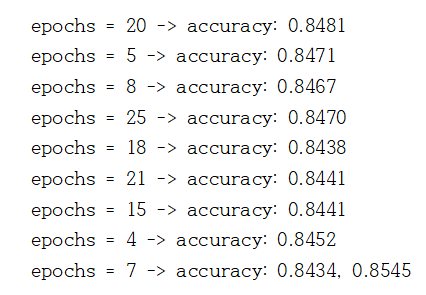

*  batch(Î≥¥ÌÜµ mini-batchÎùºÍ≥† Î∂ÄÎ¶Ñ) Îäî ÎÇòÎà†ÏßÑ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÏùòÎØ∏ÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥, 700Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ°ú Ïù¥Î§ÑÏßÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ÏûàÎäîÎç∞, Ïö∞Î¶¨Í∞Ä 7Î≤àÏóê Í±∏Ï≥êÏÑú ÌïôÏäµÏãúÌÇ®Îã§Î©¥ 7Í∞úÏùò Î∞∞ÏπòÎ•º ÎßåÎì§Ïñ¥ÏÑú ÌïôÏäµÏãúÌÇ®Îã§.

* LSTM, 1-D CNN, GlobalMaxPooling 1DÎ°ú Î™®Îç∏ÏùÑ ÏÑ†Ï†ïÌïòÏó¨ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÏòÄÎã§. ÎßàÏßÄÎßâÏóê Ïú†ÏÇ¨ Îã®Ïñ¥ Ï∞æÍ∏∞ Î∂ÄÎ∂ÑÏóêÏÑú Í∞Å Î™®Îç∏ÎßàÎã§ 'Ïû¨ÎØ∏, ÌñâÎ≥µ, Îî∞Îúª, ÏµúÏïÖ, Ïä¨Ìîî, Ïö∞Ïö∏, Î∂ÑÎÖ∏'Î•º ÎπÑÍµêÌï¥Î≥¥Î†§Í≥† ÌñàÎã§. Í∑∏ÎûòÏÑú Í±∞Ïùò 90% Ï†ïÎèÑ ÎßàÎ¨¥Î¶¨ÌïòÍ≥† ÏûàÎäî ÏôÄÏ§ëÏóê Ï†ÑÏ≤¥Ï†ÅÏù∏ Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥Î≥¥Îãà Í∞Å Î™®Îç∏ÎßàÎã§ Ìï¥Îãπ Îã®Ïñ¥Ïùò Í∞íÎì§Ïù¥ Îã¨ÎùºÏïº ÌïòÎäîÎç∞ ÌïòÎÇòÎ°ú ÎèôÏùºÌñàÎã§. ÏΩîÎìúÏóêÏÑú Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏùÑÌÖêÎç∞... Í≥†ÎØºÏùÑ ÌïòÎã§Í∞Ä Ï†ïÏã†Í±¥Í∞ïÏóê Ïù¥Î°úÏö¥ Í∏∏ÏùÑ ÌÉùÌïòÏó¨ ÎåÄÌëú Î™®Îç∏ ÌïòÎÇòÎßå Ï∂úÎ†•ÌñàÎã§... Îã§ÏùåÏóê Îçî Ïó¥Ïã¨Ìûà Ìï¥Î¥êÏïºÍ≤†Îã§.

* RNNÍ≥º LSTMÏùò Ï∞®Ïù¥Î•º Ï†ïÌôïÌûà Ïù∏ÏßÄÌïòÏßÄ Î™ªÌï¥ÏÑú Ï°∞Í∏à Ï∞æÏïÑÎ¥§Îã§. Ïù¥ Î¨∏Ï†ú ÎïåÎ¨∏Ïóê ÏùµÏä§Î•º ÏßÑÌñâÌïòÎäî Í≥ºÏ†ïÏóêÏÑú ÏãúÍ∞ÑÏùÑ Îçî Ìà¨ÏûêÌïú Í≤ΩÌñ•Ïù¥ ÏóÜÏßÄÏïäÏïÑ Îßé.Ïïò.Îã§. RNN (Recurrent Neural Networks ÏàúÌôòÏã†Í≤ΩÎßù)ÏùÄ Ïù∏Í≥µÏã†Í≤ΩÎßùÏùò Ìïú Ï¢ÖÎ•òÎ°ú, Ïú†ÎãõÍ∞ÑÏùò Ïó∞Í≤∞Ïù¥ ÏàúÌôòÏ†Å Íµ¨Ï°∞Î•º Í∞ñÎäî ÌäπÏßïÏùÑ Í∞ñÍ≥† ÏûàÎã§. Ïù¥Îü¨Ìïú Íµ¨Ï°∞Îäî ÏãúÎ≥ÄÏ†Å(ÏãúÍ∞ÑÏóê Îî∞Îùº Î≥ÄÌïòÎäî) ÎèôÏ†Å ÌäπÏßïÏùÑ Î™®Îç∏ÎßÅ Ìï† Ïàò ÏûàÎèÑÎ°ù Ïã†Í≤ΩÎßù ÎÇ¥Î∂ÄÏóê ÏÉÅÌÉúÎ•º Ï†ÄÏû•Ìï† Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§.LSTM (Long Short Term Memory)ÏùÄ Îî•Îü¨Îãù Î∂ÑÏïºÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî RNN ÏïÑÌÇ§ÌÖçÏ≤òÎã§. ÌëúÏ§ÄÏùò Feed-Forward Ïã†Í≤ΩÎßùÍ≥º Îã¨Î¶¨ LSTMÏùÄ ÌîºÎìúÎ∞±Ïó∞Í≤∞ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§. Ïû•Í∏∞ Î©îÎ™®Î¶¨ÏôÄ Îã®Í∏∞ Î©îÎ™®Î¶¨Ïóê Îì§Ïñ¥Í∞à Ï†ïÎ≥¥Î•º ÎÇòÎà† ÌïôÏäµÌïúÎã§.

 * RNNÏùÄ Îã®Í∏∞Í∏∞ÏñµÏù¥ Ï°¥Ïû¨ÌïòÍ≥†, LSTMÏùÄ Îã®Í∏∞Í∏∞ÏñµÍ≥º Ïû•Í∏∞Í∏∞ÏñµÏù¥ Î™®Îëê Ï°¥Ïû¨ÌïúÎã§. Îã®Í∏∞Í∏∞ÏñµÎøêÏù∏ RNNÏùÑ Î≥¥ÏôÑÌïòÏó¨ Ïû•Í∏∞ÏôÄ Îã®Í∏∞Î°ú ÎÇòÎàÑÏñ¥ÏÑú Ï†ïÎ≥¥Î•º Ï†ÑÎã¨ÌïòÎäî LSTMÏùò Íµ¨Ï°∞Í∞Ä ÎçîÏö± Ï†ïÍµêÌïòÎã§. LSTMÏùÄ ÏàúÏ∞®Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨Ìï† Îïå ÏûÖÎ†•Ïùò Í∏∏Ïù¥Í∞Ä Í∏∏Ïñ¥Ï†∏ÎèÑ Ïù¥Ï†Ñ Ï†ïÎ≥¥Î•º Îçî Ïò§Îûò Í∏∞ÏñµÌïòÎØÄÎ°ú RNNÎ≥¥Îã§ Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÎã§. Ï¶â, LSTMÏùÄ RNNÎ≥¥Îã§ Î∞úÏ†ÑÎêú ÌòïÌÉúÏùò ÏàúÌôòÏã†Í≤ΩÎßùÏù¥Îã§.

* Ïù¥Î≤à ÏùµÏä§Îäî Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÌïÑÏÇ¨Î•º ÌñàÎã§. ÏñëÏã¨Ïù¥ ÎßéÏù¥ Ï∞îÎ¶¨Îäî ÏùµÏä§ÏòÄÎã§... ÏïΩÍ∞ÑÏùò ÌùêÎ¶ÑÏùÄ ÏïåÍ≤†ÎäîÎç∞, ÏôÑÏ†ÑÌûà Ïù¥Ìï¥ÌñàÎã§Í≥† Ìï† ÏàòÎäî ÏóÜÎã§. Ïù¥ ÎòêÌïú ÎÇ®ÏùÄ ÎÇòÏùò ÏàôÏ†úÏù¥Îã§...

  ÏùµÏä§Î•º ÌïòÎ©¥ÏÑú Î∂ÄÏ°±Ìï®Ïù¥ ÎßéÎã§Îäî Í±∏ ÎçîÏö± ÎäêÍºàÎã§. Í∑∏ÎûòÎèÑ Ï†úÏ∂úÌï¥ÏïºÍ≤†Îã§. Ï†ïÏã†Í±¥Í∞ïÏùÑ ÏúÑÌïòÏó¨ ÏùµÏä§Î•º Îπ®Î¶¨ ÎÅùÎÇ¥Î†§Í≥† ÌïúÎã§. Îã§ÏùåÏóê Îçî Î∂ÑÎ∞úÌï¥ÏïºÍ≤†Îã§!

**üîÜ Ï∞∏Í≥†ÏûêÎ£å**

* https://github.com/yenaryu/AI/blob/main/%5BE-06%5Dmovie%20reivew%20sentiment.ipynb